In [1]:
library(tidyverse)
library(janitor)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




# Question Chosen 
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Individual Planning Report

Each student is expected to prepare a 1 page (max 500 words, where code does not count toward the word count) written proposal that describes the data they are working on, demonstrates an understanding of all variables and potential issues in the data, and identifies both the broad question they would like to address and the specific question they have formulated. The proposal should be done in a Jupyter notebook, and then submitted in two formats:

as an .html file (File -> Download As -> HTML) as an .ipynb file. This file must be fully reproducible. It must run completely from top to bottom without any additional files. It's important to note that this first step in the project will be completed individually. Every student needs to write and submit their own assignment. We aim to ensure that all students in the group are well-prepared and able to contribute effectively to the final report.

(1) Data Description: Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics (report values to 2 decimal places), number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

# 1. Data Description: 
### number of observations, summary statistics, number of variables, name and type of variables, meaning of variables, issues and potential issues in the data set, method of data collection

## Information About Variables

We will use the following predictors to predict whether or not a player will subscribe to a PLAICraft newsletter:
- Experience Level of Player: `experience`
- Total Hours Played by Player: `played_hours`
- Age of Player: `age`

Variables that will not be used as a predicitor:
- Gender of Player :`gender` since the k-nn model calculates distances of the nearest neighbors to the unknown dataset, gender includes descrete categories that cannot be used in the calculations. While categorical variables could be converted to numeric values, this is not appropriate for gender because there is no meaningful numeric relationship between categories such as Male, Female, or Other.
- Hashed Email of Players:`hashedEmail` it does not give us descriptive/charteristic information about the players.

Response variable:
- Whether or not the user is subscribe to the PLAICraft newsletter: `subscribe` in the players.csv dataset will be used to calculate the accuracy of our k-nn model and is used in the following graphs to display the relationship of those who subscibe vs the predictor varibles.

## Specfic Question: 
Can the explanatory variables experience of level of players, total hours played by player, and age of player help predict whether or not they will subscribe to a PLAICraft newsletter in the players.csv data set?”

In [91]:
#loading the data. 
players <- read_csv("players.csv") |>
    select(-hashedEmail) |> 
    rename(age = Age)|> #renaming the column to become lowercase to allow consistency between all column names
    mutate(subscribe = as_factor(subscribe)) |> #since the observations in subscribe are decrete categories, changing the column to a factor type to allows smoother use when dispalying this column in colours within graphs     
    mutate(subscribe = fct_recode(subscribe, "yes" = "TRUE", "no" = "FALSE")) 

players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,name,gender,age
<chr>,<fct>,<dbl>,<chr>,<chr>,<dbl>
Pro,yes,30.3,Morgan,Male,9
Veteran,yes,3.8,Christian,Male,17
Veteran,no,0.0,Blake,Male,17
Amateur,yes,0.7,Flora,Female,21
Regular,yes,0.1,Kylie,Male,21
Amateur,yes,0.0,Adrian,Female,17
Regular,yes,0.0,Luna,Female,19
Amateur,no,0.0,Emerson,Male,21
Amateur,yes,0.1,Natalie,Male,47


`summarise()` has grouped output by 'experience'. You can override using the
`.groups` argument.


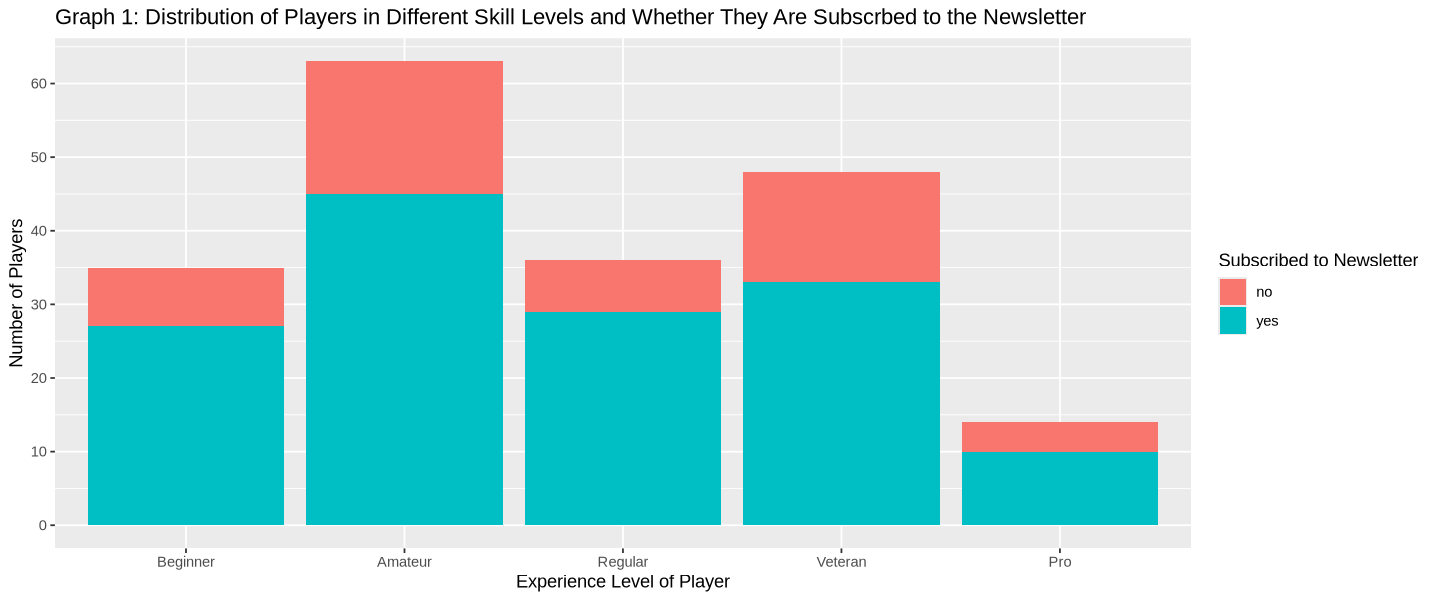

In [85]:
options(repr.plot.width = 12, repr.plot.height = 5)

#Graph 1: Distribution of Players in Different Skill Levels and Whether They Are Subscrbed to the PLAICraft Newsletter
experience_distribution <- players |>
    group_by(experience, subscribe)|>
    summarize(number_of_players = n()) |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"))) |>
    ggplot(aes(x = experience, y = number_of_players, fill = subscribe)) +
    geom_bar(stat= "identity") +
    labs(x = "Experience Level of Player", y = "Number of Players", fill = "Subscribed to Newsletter") +
    ggtitle("Graph 1: Distribution of Players in Different Skill Levels and Whether They Are Subscrbed to the PLAICraft Newsletter") +
    theme(text = element_text(size = 11)) +
    scale_y_continuous(breaks = seq(from = 0, to = 250, by = 10))
experience_distribution

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


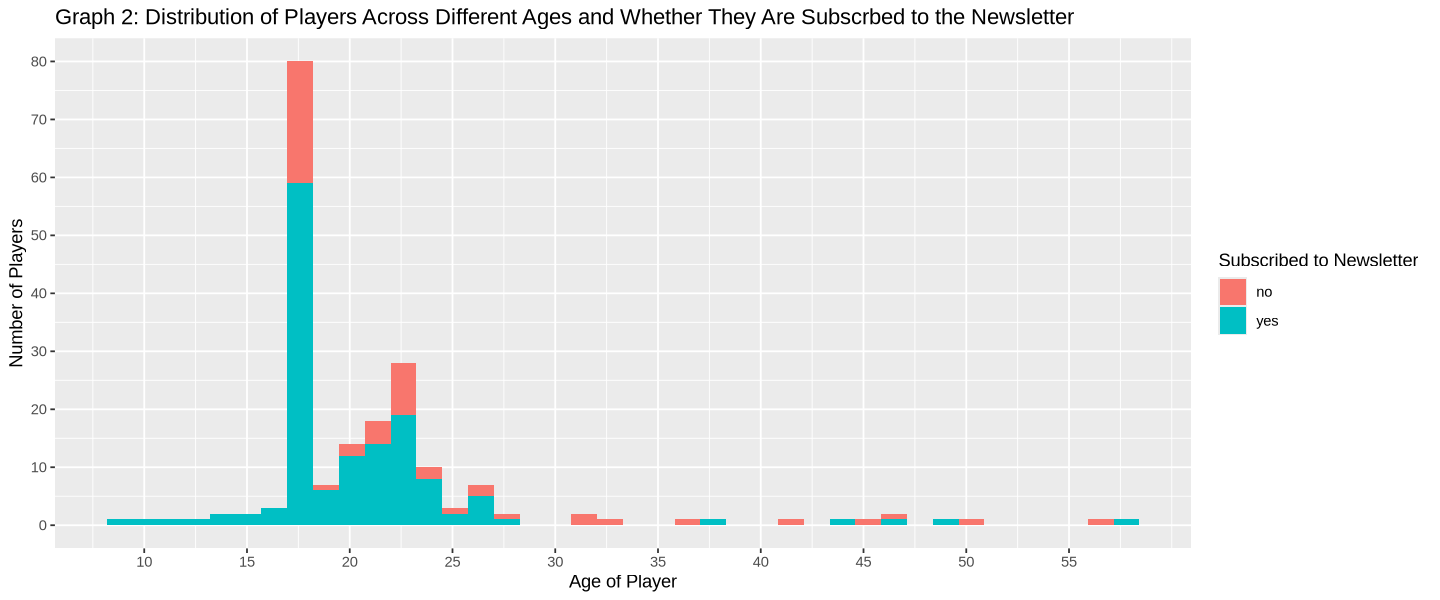

In [87]:
options(repr.plot.width = 12, repr.plot.height = 5)

#Graph 2: Distribution of Players Across Different Ages and Whether They Are Subscrbed to the PLAICraft Newsletter
age_disribution <- players |>
    ggplot(aes(x = age, fill = subscribe)) +
    geom_histogram(bins=40) +
    labs(x = "Age of Player", y = "Number of Players", fill = "Subscribed to Newsletter") +
    ggtitle("Graph 2: Distribution of Players Across Different Ages and Whether They Are Subscrbed to the PLAICraft Newsletter") +
    theme(text = element_text(size = 11)) +
    scale_x_continuous(breaks = seq(from = 5, to = 57, by = 5)) +
    scale_y_continuous(breaks = seq(from = 0, to = 80, by = 10))
age_disribution

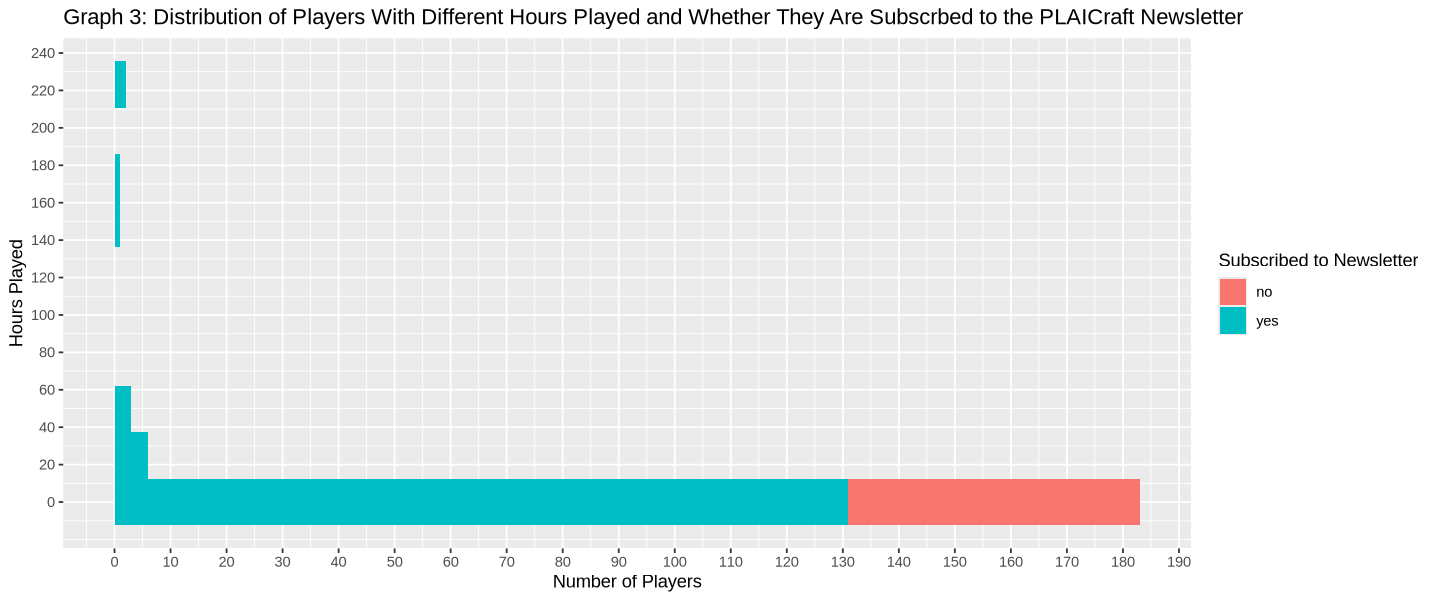

In [90]:
options(repr.plot.width = 12, repr.plot.height = 5)

#Graph 3: Distribution of Players With Different Hours Played and Whether They Are Subscrbed to the PLAICraft Newsletter
hours_disribution <- players |>
    ggplot(aes(y = played_hours, fill = subscribe)) +
    geom_histogram(bins=10) +
    labs(y = "Hours Played", x = "Number of Players", fill = "Subscribed to Newsletter") +
    ggtitle("Graph 3: Distribution of Players With Different Hours Played and Whether They Are Subscrbed to the PLAICraft Newsletter") +
    theme(text = element_text(size = 11)) +
    scale_x_continuous(breaks = seq(from = 0, to = 250, by = 10)) +
    scale_y_continuous(breaks = seq(from = 0, to = 250, by = 20))
hours_disribution

`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


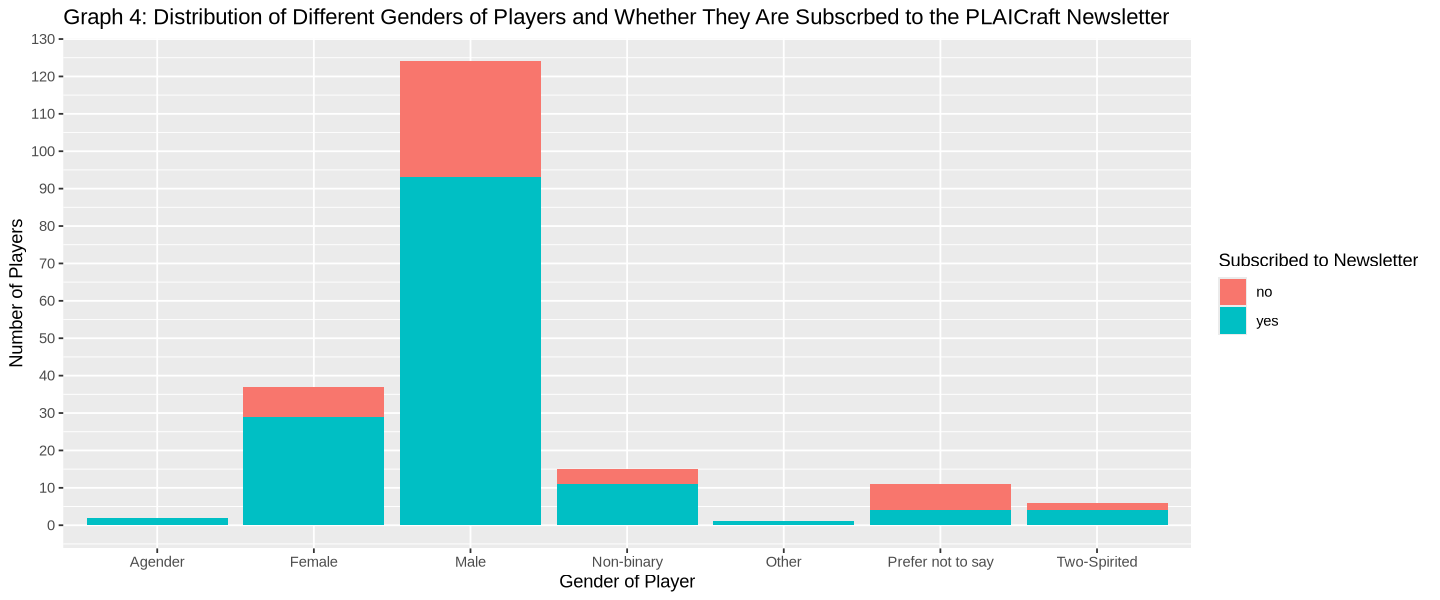

In [89]:
options(repr.plot.width = 12, repr.plot.height = 5)

#Graph 4: Distribution of Different Genders of Players and Whether They Are Subscrbed to the PLAICraft Newsletter
gender_distribution <- players |>
    group_by(gender, subscribe)|>
    summarize(number_of_players = n()) |>
    ggplot(aes(x = gender, y = number_of_players, fill = subscribe)) +
    geom_bar(stat= "identity") +
    labs(x = "Gender of Player", y = "Number of Players", fill = "Subscribed to Newsletter") +
    ggtitle("Graph 4: Distribution of Different Genders of Players and Whether They Are Subscrbed to the PLAICraft Newsletter") +
    theme(text = element_text(size = 11)) +
    scale_y_continuous(breaks = seq(from = 0, to = 140, by = 10))
gender_distribution

## Summary Statistics Found From the Data Set and Graphs



(2) Questions:
Clearly state one broad question that you will address, and the specific question that you have formulated. Your question should involve one response variable of interest and one or more explanatory variables, and should be stated as a question. One common question format is: “Can [explanatory variable(s)] predict [response variable] in [dataset]?”, but you are free to format your question as you choose so long as it is clear. Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.

(3) Exploratory Data Analysis and Visualization
In this assignment, you will:

Demonstrate that the dataset can be loaded into R.
Do the minimum necessary wrangling to turn your data into a tidy format. Do not do any additional wrangling here; that will happen later during the group project phase.
Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.
Make a few exploratory visualizations of the data to help you understand it.
Use our visualization best practices to make high-quality plots (make sure to include labels, titles, units of measurement, etc)
Explain any insights you gain from these plots that are relevant to address your question
Note: do not perform any predictive analysis here. We are asking for an exploration of the relevant variables to demonstrate that you understand them well before performing any additional modelling, and to identify potential problems you anticipate encountering.

(4) Methods and Plan
Propose one method to address your question of interest using the selected dataset and explain why it was chosen. Do not perform any modelling or present results at this stage. We are looking for high-level planning regarding model choice and justifying that choice.

In your explanation, respond to the following questions:

Why is this method appropriate?
Which assumptions are required, if any, to apply the method selected?
What are the potential limitations or weaknesses of the method selected?
How are you going to compare and select the model?
How are you going to process the data to apply the model? For example: Are you splitting the data? How? How many splits? What proportions will you use for the splits? At what stage will you split? Will there be a validation set? Will you use cross validation?